Q&A Activity Question Week -10
Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\employee.csv")
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# Reset the index as "name" as the index.

In [3]:
data.set_index('name',inplace=True)
data


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Select rows for specific names Jack Morgan and Josh wills.

In [4]:
data.loc[['Jack Morgan','Josh Wills'],:]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# Select data for multiple values "Sales" and “Finance”.

In [5]:
data2=['Sales','Finance']
  
data[data.department.isin(data2)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 700 performance score.

In [30]:
data.loc[data['performance_score'] > 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,59667.0,No details,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# Display employee who has more than 500 and less than 700 performance score

In [6]:
data3 = data[(data['performance_score']>500) & (data['performance_score']<700)].index

for i in data3:
    print(i)

S Kumar
Jack Morgan
Ying Chin
Satyam Sharma


# Check and handle missing values in the dataset.

In [7]:
missing_values=data.isna().sum()
missing_values


age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [8]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [9]:
# As the details in respect of gender are not available in few rows, it is filled with 'No details'

In [10]:
data["gender"].fillna("No details", inplace = True) 
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,No details,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,No details,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


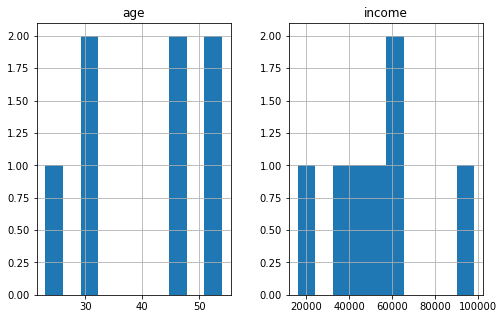

In [11]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,5))
plt.show()

In [12]:
import random
import numpy as np


In [13]:
data["age"].fillna(data['age'].median(), inplace = True) 
  
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,No details,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,No details,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [14]:
for i in ['income']:
    data[i]=data[i].fillna(data[data['grade']=='G3']['income'].mean()).round(decimals = 0) 
data    

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,59667.0,No details,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,No details,Sales,G3,649
James Authur,54.0,59667.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


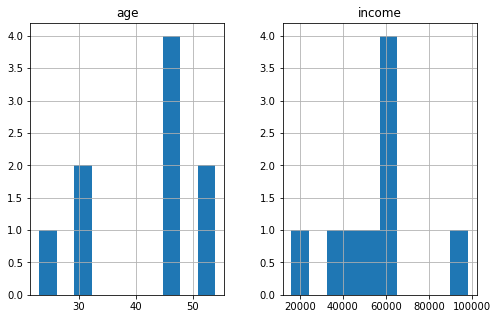

In [15]:
freqgraph=data.select_dtypes(include=['float'])
freqgraph.hist(figsize=(8,5))

plt.show()

# Check the outliers and handle outliers in performance score using Percentiles.

In [16]:
data.describe()

,age,income,performance_score
count,9.000000,9.000000,9.000000
mean,41.444444,54370.444444,610.666667
std,10.760008,22740.368061,235.671912
min,23.000000,16000.000000,53.000000
25%,32.000000,42000.000000,556.000000
50%,45.000000,59667.000000,674.000000
75%,45.000000,62000.000000,711.000000
max,54.000000,98000.000000,901.000000


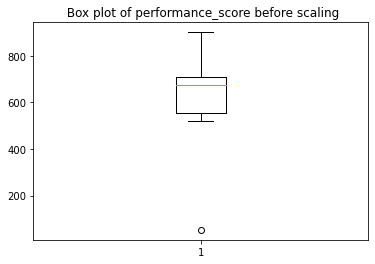

In [17]:
plt.boxplot(data['performance_score'])
plt.title(' Box plot of performance_score before scaling');

In [18]:
Q3 = data['performance_score'].quantile(0.75)
Q1 = data['performance_score'].quantile(0.25)
IQR = Q3 - Q1
low_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
print(low_limit)
print(upper_limit)

323.5
943.5


In [19]:
outlier=[]
for x in data['performance_score']:
    if (x>upper_limit) or (x<low_limit):
        outlier.append(x)


In [20]:
outlier

[53]

In [21]:
ind1=data['performance_score']<low_limit
data.loc[ind1].index


Index(['James Authur'], dtype='object', name='name')

In [22]:
data.loc[(data['performance_score'] < low_limit) ^ (data['performance_score'] > upper_limit)]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,59667.0,F,Operations,G3,53


In [23]:
#The only value in respect of James Authur who scored 53 performance score is the outlier, hence dropped

In [24]:
data.drop(['James Authur'], inplace=True)
data


,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,59667.0,No details,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,No details,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


Text(0.5, 1.0, 'Box plot of performance_scoreafter scaling')

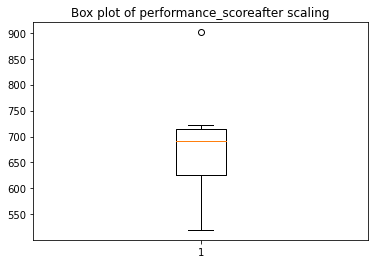

In [26]:
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance_scoreafter scaling')

# Check the gender column and do Dummy encoding.

In [27]:
#generate binary values using get_dummies

data1 = pd.get_dummies(data['gender'])
data1

,F,M,No details
name,,,
Allen Smith,0,0,1
S Kumar,1,0,0
Jack Morgan,0,1,0
Ying Chin,1,0,0
Dheeraj Patel,1,0,0
Satyam Sharma,0,0,1
Josh Wills,1,0,0
Leo Duck,0,1,0


In [28]:
#Concatenating the actual dataset with dummy variables.
data2=pd.concat([data,data1],axis='columns')
data2

,age,income,gender,department,grade,performance_score,F,M,No details
name,,,,,,,,,
Allen Smith,45.0,59667.0,No details,Operations,G3,723,0,0,1
S Kumar,45.0,16000.0,F,Finance,G0,520,1,0,0
Jack Morgan,32.0,35000.0,M,Finance,G2,674,0,1,0
Ying Chin,45.0,65000.0,F,Sales,G3,556,1,0,0
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711,1,0,0
Satyam Sharma,45.0,62000.0,No details,Sales,G3,649,0,0,1
Josh Wills,54.0,52000.0,F,Finance,G3,901,1,0,0
Leo Duck,23.0,98000.0,M,Sales,G4,709,0,1,0


# Do the standard scaling on the feature performance score

In [29]:
from sklearn.preprocessing import StandardScaler
scaling = StandardScaler()
scaling.fit_transform(data[['performance_score']])

array([[ 0.39226224],
       [-1.47587231],
       [-0.05866679],
       [-1.14457751],
       [ 0.28183064],
       [-0.28873262],
       [ 2.03033096],
       [ 0.26342538]])